# 使用GA算法解决TSP问题

* Life.py 基因序列类

In [4]:
import math
import random

SCORE_NONE = -1
 
class Life(object):
      """个体类"""
      def __init__(self, aGene = None):
            self.gene = aGene # 基因序列
            self.score = SCORE_NONE # 对应的适应度

* GA.py 遗传算法类

In [10]:
import matplotlib.pyplot as plt
class GA(object):
    """遗传算法类"""

    def __init__(self, aCrossRate, aMutationRate, aLifeCount, aGeneLength, aMatchFun=lambda life: 1):
        self.crossRate = aCrossRate  # 交叉概率
        self.mutationRate = aMutationRate  # 突变概率
        self.lifeCount = aLifeCount  # 种群数量，就是每次我们在多少个城市序列里筛选，这里初始化为100
        self.geneLength = aGeneLength  # 其实就是城市数量
        self.matchFun = aMatchFun  # 适配函数
        self.lives = []  # 种群
        self.best = None  # 保存这一代中最好的个体
        self.generation = 1  # 一开始的是第一代
        self.crossCount = 0  # 一开始还没交叉过，所以交叉次数是0
        self.mutationCount = 0  # 一开始还没变异过，所以变异次数是0
        self.bounds = 0.0  # 适配值之和，用于选择时计算概率

        self.initPopulation()  # 初始化种群

    def initPopulation(self):
        """初始化种群"""
        self.lives = []
        for i in range(self.lifeCount):
            # gene = [0,1,…… ,self.geneLength-1]
            # 事实就是0到33
            gene = list(range(self.geneLength))
            # 将0到33序列的所有元素随机排序得到一个新的序列
            random.shuffle(gene)
            # Life这个类就是一个基因序列，初始化life的时候,两个参数，一个是序列gene，一个是这个序列的初始适应度值
            # 因为适应度值越大，越可能被选择，所以一开始种群里的所有基因都被初始化为-1
            life = Life(gene)
            # 把生成的这个基因序列life填进种群集合里
            self.lives.append(life)

    def judge(self):
        """评估，计算每一个个体的适配值"""
        # 适配值之和，用于选择时计算概率
        self.bounds = 0.0
        # 假设种群中的第一个基因被选中
        self.best = self.lives[0]
        for life in self.lives:
            life.score = self.matchFun(life)
            self.bounds += life.score
            # 如果新基因的适配值大于原先的best基因，就更新best基因
            if self.best.score < life.score:
                self.best = life

    def cross(self, parent1, parent2):
        """交叉"""
        index1 = random.randint(0, self.geneLength - 1)
        index2 = random.randint(index1, self.geneLength - 1)
        tempGene = parent2.gene[index1:index2]  # 交叉的基因片段
        newGene = []
        p1len = 0
        for g in parent1.gene:
            if p1len == index1:
                newGene.extend(tempGene)  # 插入基因片段
                p1len += 1
            if g not in tempGene:
                newGene.append(g)
                p1len += 1
        self.crossCount += 1
        return newGene

    def mutation(self, gene):
        """突变"""
        # 相当于取得0到self.geneLength - 1之间的一个数，包括0和self.geneLength - 1
        index1 = random.randint(0, self.geneLength - 1)
        index2 = random.randint(0, self.geneLength - 1)
        # 把这两个位置的城市互换
        gene[index1], gene[index2] = gene[index2], gene[index1]
        # 突变次数加1
        self.mutationCount += 1
        return gene

    def getOne(self):
        """选择一个个体"""
        # 产生0到（适配值之和）之间的任何一个实数
        r = random.uniform(0, self.bounds)
        for life in self.lives:
            r -= life.score
            if r <= 0:
                return life

        raise Exception("选择错误", self.bounds)

    def newChild(self):
        """产生新后的"""
        parent1 = self.getOne()
        rate = random.random()

        # 按概率交叉
        if rate < self.crossRate:
            # 交叉
            parent2 = self.getOne()
            gene = self.cross(parent1, parent2)
        else:
            gene = parent1.gene

        # 按概率突变
        rate = random.random()
        if rate < self.mutationRate:
            gene = self.mutation(gene)

        return Life(gene)

    def next(self):
        """产生下一代"""
        self.judge()  # 评估，计算每一个个体的适配值
        newLives = []
        newLives.append(self.best)  # 把最好的个体加入下一代
        while len(newLives) < self.lifeCount:
            newLives.append(self.newChild())
        self.lives = newLives
        self.generation += 1

经过4001次迭代，最优解距离为：179.884273
遍历城市顺序为：
哈尔滨
长春
沈阳
成都
拉萨
乌鲁木齐
西宁
兰州
银川
呼和浩特
北京
天津
济南
南京
合肥
南昌
长沙
武汉
郑州
石家庄
太原
西安
重庆
贵阳
昆明
南宁
海口
澳门
香港
广州
福州
台北
杭州
上海


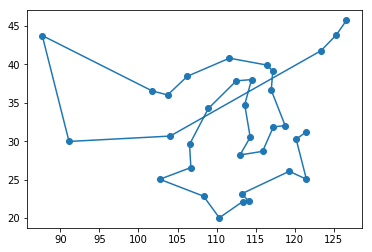

In [13]:
class TSP(object):
    def __init__(self, aLifeCount=100, ):
        self.initCitys()
        self.lifeCount = aLifeCount
        self.ga = GA(aCrossRate=0.7,
                     aMutationRate=0.02,
                     aLifeCount=self.lifeCount,
                     aGeneLength=len(self.citys),
                     aMatchFun=self.matchFun())

    def initCitys(self):
        self.citys = []
        # 这个文件里是34个城市的经纬度
        f = open("distanceMatrix.txt", "r")
        while True:
            # 一行一行读取
            loci = str(f.readline())
            if loci:
                pass  # do something here
            else:
                break
            # 用readline读取末尾总会有一个回车，用replace函数删除这个回车
            loci = loci.replace("\n", "")
            # 按照tab键分割
            loci = loci.split("\t")
            # 中国34城市经纬度读入citys
            self.citys.append((float(loci[1]), float(loci[2]), loci[0]))

    # order是遍历所有城市的一组序列，如[1,2,3,7,6,5,4,8……]
    # distance就是计算这样走要走多长的路
    def distance(self, order):
        distance = 0.0
        # i从-1到32,-1是倒数第一个
        for i in range(-1, len(self.citys) - 1):
            index1, index2 = order[i], order[i + 1]
            city1, city2 = self.citys[index1], self.citys[index2]
            distance += math.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

        return distance
    
    def paint(self, order):
        x = [self.citys[i][0] for i in range(34)]
        y = [self.citys[i][1] for i in range(34)]
        x_order = []; y_order = []
        for i in range(len(order)):
            index = order[i]
            x_order.append(x[index])
            y_order.append(y[index])
        plt.scatter(x, y)
        plt.plot(x_order, y_order)
        plt.show()

    # 适应度函数，因为我们要从种群中挑选距离最短的，作为最优解，所以（1/距离）最长的就是我们要求的
    def matchFun(self):
        return lambda life: 1.0 / self.distance(life.gene)

    def run(self, n=0):
        while n > 0:
            self.ga.next()
            distance = self.distance(self.ga.best.gene)
            n -= 1
        print("经过%d次迭代，最优解距离为：%f" % (self.ga.generation, distance))
        print("遍历城市顺序为：")
        # print "遍历城市顺序为：", self.ga.best.gene
        # 打印出我们挑选出的这个序列中
        for i in self.ga.best.gene:
            print(self.citys[i][2])
        return self.ga.best.gene


def main():
    tsp = TSP()
    order = tsp.run(4000)
    tsp.paint(order)

if __name__ == '__main__':
	main()